<a href="https://colab.research.google.com/github/cheungngo/MScGenomics/blob/master/5030/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW3

### Question 1: Data frame, subsetting, function, and file I/O

Read in the states.txt file into a data frame as described.

In [2]:
states = read.delim("/content/states.txt", header = TRUE, sep = "\t")

In [122]:
print(head(states))

        name population income murder hs_grad region
1    Alabama       3615   3624   15.1    41.3  South
2     Alaska        365   6315   11.3    66.7   West
3    Arizona       2212   4530    7.8    58.1   West
4   Arkansas       2110   3378   10.1    39.9  South
5 California      21198   5114   10.3    62.6   West
6   Colorado       2541   4884    6.8    63.9   West


a. Use logical subsetting to extract a numeric vector called murder_lowincome containing murder rates
for just those states with per capita incomes (the 3rd column) less than the median per capita income.
Similarly, extract a vector called murder_highincome containing murder rates for just those states with
greater than (or equal to) the median per capita income. Run a two-sample t.test() to determine
whether the mean murder rates are different between these two groups.

In [10]:
income_per_capita = states$income / states$population # calculate the income per capita for each states
median_ipc = median(income_per_capita, na.rm=T) # calculate the median of the percapita income
ind_high = which(income_per_capita >= median_ipc) # the states with high income
ind_low = which(income_per_capita < median_ipc) # the states with low income
murder_lowincome = states$murder[ind_low]
murder_highincome = states$murder[ind_high]


In [11]:
print(t.test(murder_lowincome, murder_highincome))


	Welch Two Sample t-test

data:  murder_lowincome and murder_highincome
t = 4.0433, df = 46.268, p-value = 0.0001977
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.850271 5.517729
sample estimates:
mean of x mean of y 
    9.220     5.536 



```
p-value < 0.05; there is significant differences between the two sets of states, 

with higher murder rates for states with below-median income-per-capita
```

b. Use syntax of [row_selector, column_selector] to extract a new data frame called
states_name_pop containing only the columns for name and population. Extract another data frame
called states_gradincome_high containing all columns, and all rows where the income is greater
than the median of income or where hs_grad is greater than the median of hs_grad. (There are 35 such
states listed in the table.)


In [15]:
# creating the "states_name_pop"

states_name_pop = states[,1:2]

In [123]:
print(head(states_name_pop))

        name population
1    Alabama       3615
2     Alaska        365
3    Arizona       2212
4   Arkansas       2110
5 California      21198
6   Colorado       2541


In [124]:
print(dim(states_name_pop))

[1] 51  2


In [14]:
# Creating the "states_gradincome_high"

med_income = median(states$income, na.rm=T)
med_hs_grad = median(states$hs_grad, na.rm=T)
states_gradincome_high = states[which( (states$income > med_income) | (states$hs_grad > med_hs_grad) ),]

In [125]:
 print(head(states_gradincome_high))

         name population income murder hs_grad    region
2      Alaska        365   6315   11.3    66.7      West
3     Arizona       2212   4530    7.8    58.1      West
5  California      21198   5114   10.3    62.6      West
6    Colorado       2541   4884    6.8    63.9      West
7 Connecticut       3100   5348    3.1    56.0 Northeast
8    Delaware        579   4809    6.2    54.6     South


In [126]:
print(dim(states_gradincome_high))

[1] 35  6


c. Create a table called states_by_region_income , where the rows are ordered first by region and
second by income. (Hint: You may want to use the order() function here. The order() function can
take multiple parameters as in order(vec1, vec2) , which considered in turn in determining the
ordering.

In [22]:
states_by_region_income = states[order(states$region, states$income),]

In [127]:
print(states_by_region_income)

             name population income murder hs_grad        region
23       # mitten         NA     NA     NA      NA              
42   South Dakota        681   4167    1.7    53.3 North Central
26       Missouri       4767   4254    9.3    48.8 North Central
14        Indiana       5313   4458    7.1    52.9 North Central
50      Wisconsin       4589   4468    3.0    54.5 North Central
28       Nebraska       1544   4508    2.9    59.3 North Central
36           Ohio      10735   4561    7.4    53.2 North Central
15           Iowa       2861   4628    2.3    59.0 North Central
16         Kansas       2280   4669    4.5    59.9 North Central
24      Minnesota       3921   4675    2.3    57.6 North Central
22       Michigan       9111   4751   11.1    52.8 North Central
35   North Dakota        637   5087    1.4    50.3 North Central
13       Illinois      11197   5107   10.3    52.6 North Central
19          Maine       1058   3694    2.7    54.7     Northeast
46        Vermont        

d. Write a function called normalize_mean_sd() that takes such a vector and returns the normalized
version. The function should work even if any values are NA (the normalized version of NA should
simply be NA). To “normalize” a vector of numbers, first subtract the mean from each number and then
divide each by the standard deviation of the numbers. Use vector like
sample <- c(3.2, 5.1, 2.4, 1.6, NA, 7.9) to test your function.


In [25]:
normalize_mean_sd = function(vec) {
    std = sd(vec, na.rm = T)
    m = mean(vec, na.rm = T)
    out = (vec-m) / std
    return(out)
}

In [128]:
print(normalize_mean_sd(c(3.2, 5.1, 2.4, 1.6, NA, 7.9)))

[1] -0.3335277  0.4208802 -0.6511732 -0.9688186         NA  1.5326393


e. Use apply() , together with the function normalize_mean_sd() that you created, to normalize the
data columns in states.txt . Then write the new table to a new file called states_normalized.txt .


In [30]:
states_normalized = cbind(states[,1], apply(states[,c(2:5)], 2, normalize_mean_sd), states[,6])

In [129]:
# visualizing the outcome

print(head(states_normalized))

                  population           income              murder              
[1,] "Alabama"    "-0.141431562681068" "-1.32113867298255" "2.09181009602121"  
[2,] "Alaska"     "-0.869398017201785" "3.05824561994186"  "1.06242931838839"  
[3,] "Arizona"    "-0.455689081355704" "0.153302861536038" "0.114315444252907" 
[4,] "Arkansas"   "-0.478536028543739" "-1.7214837254015"  "0.737361704399084" 
[5,] "California" "3.79697895111517"   "1.10371550630298"  "0.79153964006397"  
[6,] "Colorado"   "-0.381996477190376" "0.729409156480386" "-0.156574234071518"
     hs_grad                    
[1,] "-1.46192932754307" "South"
[2,] "1.68280347391306"  "West" 
[3,] "0.618051423026339" "West" 
[4,] "-1.63526105675719" "South"
[5,] "1.17518912407172"  "West" 
[6,] "1.33614001548483"  "West" 


In [32]:
# writing the table

write.table(states_normalized, "states_normalized.txt", sep="\t", col.names=T, row.names=F)

### Question 2: R Plotting

The data file ozone.csv was obtained from the supplementary data of Biostatistics: A Methodology for the
Health Sciences (http://faculty.washington.edu/heagerty/Books/Biostatistics/index-data.html), describing the
weather conditions in New York City in 1973. Full description available here
(http://faculty.washington.edu/heagerty/Books/Biostatistics/DATA/ozonedoc.txt).

a. Make the scatter plot of Solar Radiation against Ozone, the histogram of Wind Speed and the Boxplot
of Ozone level per month. They should look as follows. Hint: For the histogram, see the breaks and
freq arguments to create 20 bins and display density rather than frequency. For the box plot, try the
rainbow function; the colors are not necessary the same as in the figure below. The las argument
changes the label orientation. See ?par . Look at the arguments to boxplot to see how to change the
names printed under each box.


In [38]:
ozone = read.delim("/content/ozone.csv", sep = ",", header = T)

In [130]:
print(head(ozone))

  Ozone Solar.R Wind Temp Month Day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6


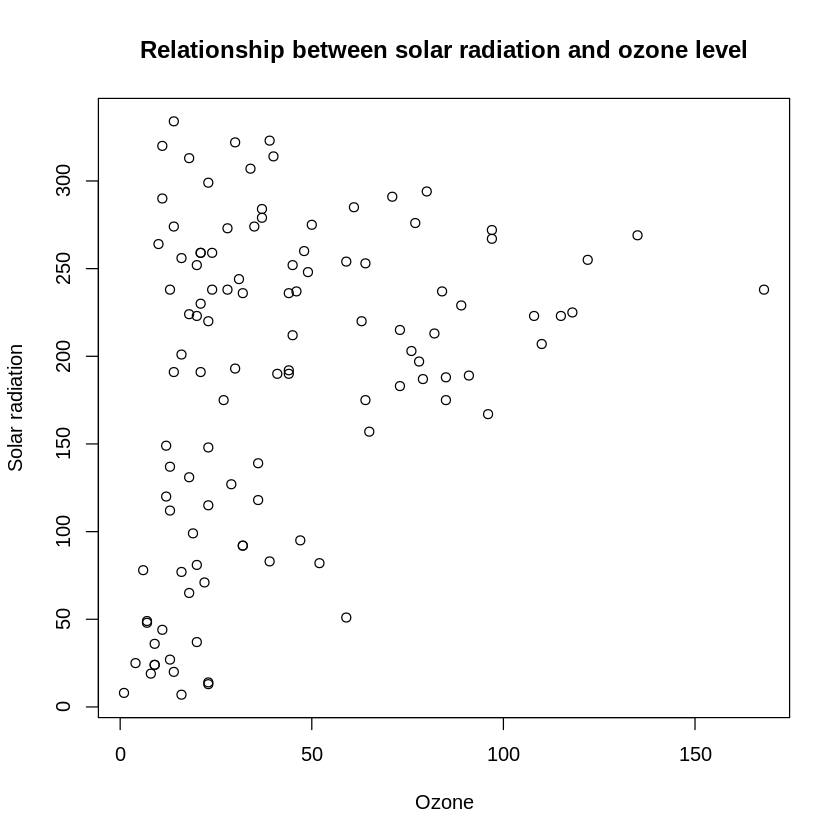

In [192]:
plot(ozone$Ozone, ozone$Solar.R, 
main = "Relationship between solar radiation and ozone level", 
xlab = "Ozone", ylab = "Solar radiation")

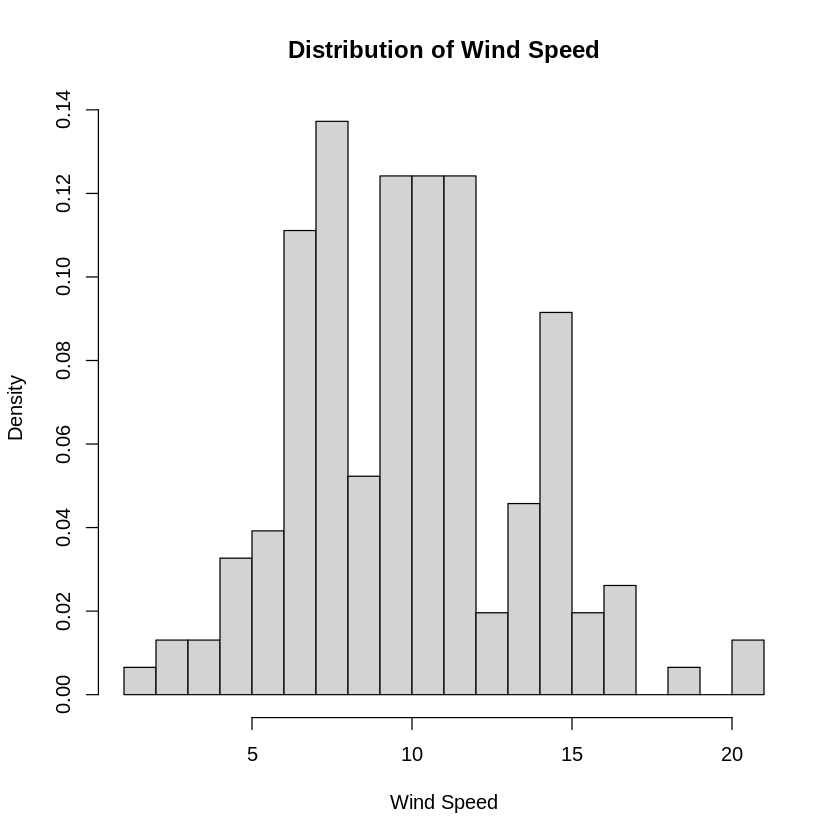

In [193]:
hist(ozone$Wind, freq = F, breaks = 20,
main = "Distribution of Wind Speed", xlab = "Wind Speed")

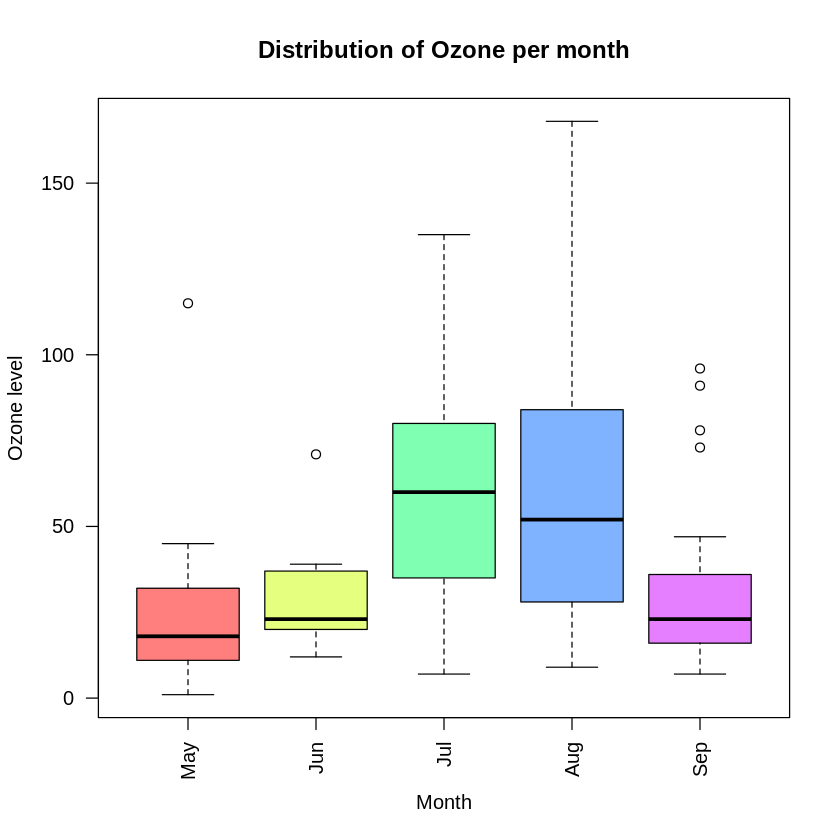

In [194]:
boxplot(ozone$Ozone ~ ozone$Month, 
names = c("May", "Jun", "Jul", "Aug", "Sep"), las = 2,
col = rainbow(5, alpha = 0.5),
xlab = "Month", ylab = "Ozone level", main = "Distribution of Ozone per month")

b. Create a layout with three columns with par function. Then plot Ozone versus Solar Radiation, Wind
Speed and Temperature on separate graphs. Use different colors and plotting characters on each plot.
At last, save the plot to a pdf. HINT: Create the graph first in RStudio. When you’re happy with it, re-run
the code preceded by the pdf function to save to a file. Don’t forget to use dev.off() to close the file

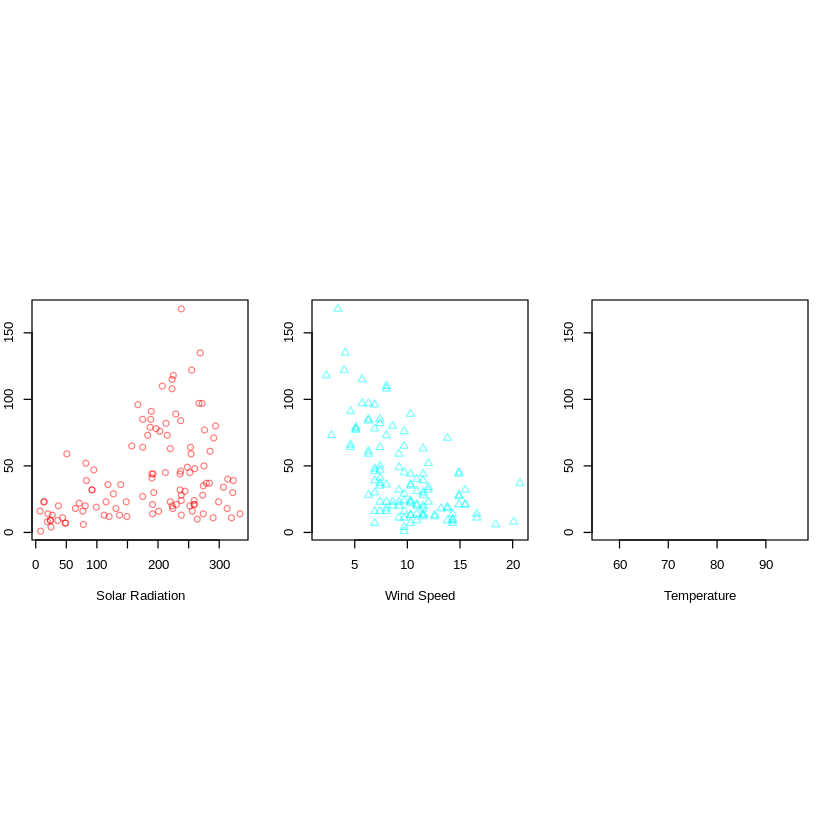

In [195]:
color = rainbow(3, alpha = 0.5)
par(mfrow=c(1,3), pin=c(1.8,2))
plot(ozone$Ozone ~ ozone$Solar.R, col = color[1], pch = 1,
xlab = "Solar Radiation", ylab = "Ozone")
plot(ozone$Ozone ~ ozone$Wind, col = color[2], pch = 2,
xlab = "Wind Speed", ylab = "Ozone")
plot(ozone$Ozone ~ ozone$Temp, col = color[3], pch = 3,
xlab = "Temperature", ylab = "Ozone")

c. Temperature and Ozone level seem to be correlated. However, there are some observations that do not
seem to fit the trend, especially those with Ozone level > 100. - Modify the plot so that these outlier
observations are in a different colour. - Add a legend to help interpret the plot HINT: You can break
down the problem into the following steps - Create a blank plot - Identify observations with ozone > 100 - Plot the corresponding Temperature and Ozone values for these in red - Identify observations with
ozone < 100 - Plot the corresponding Temperature and Ozone values for these in orange

In [96]:
ind = which(ozone$Ozone > 100) # to identify observations with ozone > 100

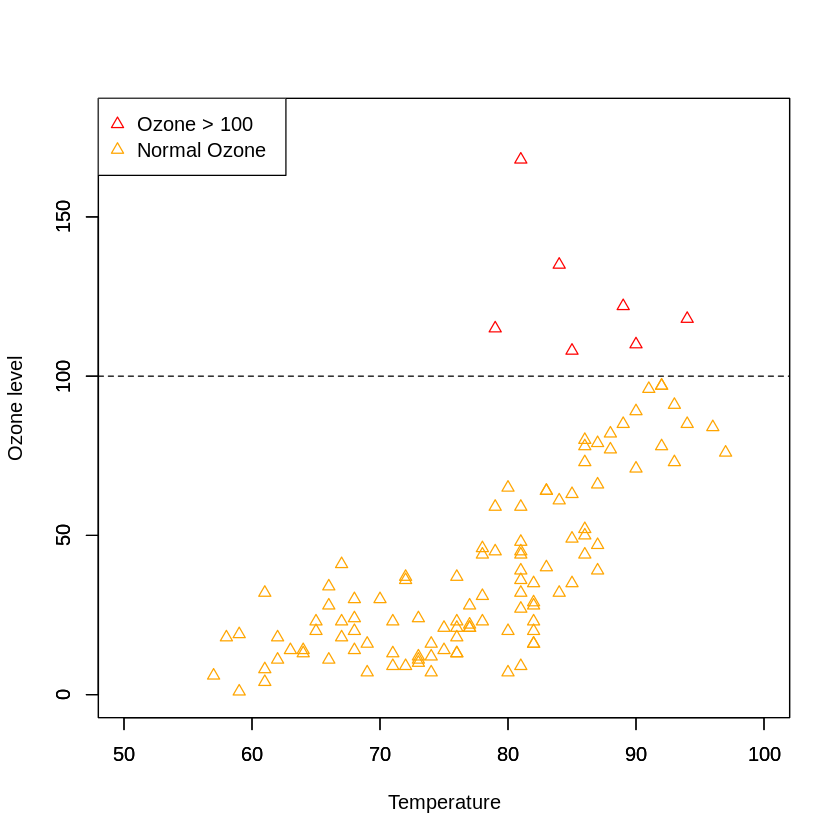

In [196]:
# Plot the corresponding Temperature and Ozone values for these in red
plot(ozone$Ozone[ind]~ozone$Temp[ind], col = "red", pch = 2,
xlim = c(50,100), ylim = c(0, 180),
xlab = "", ylab = "")

par(new=T)

# Plot the corresponding Temperature and Ozone values for these in orange
plot(ozone$Ozone[-ind]~ozone$Temp[-ind], col = "orange", pch = 2,
xlim = c(50,100), ylim = c(0, 180),
xlab = "Temperature", ylab = "Ozone level")

# Add the dotted line at Ozone = 100
abline(h = 100, lty = 2)

# Add the legends
legend(x = "topleft", 
       legend = c("Ozone > 100", "Normal Ozone"),
       col = c("red", "orange"),  
       pch = c(2,2)) 

### Question 3: Hypothesis testing (for Lecture 10)


The gene expression data collected by Golub et al. (1999) are among the classical in bioinformatics. The data
are stored in golub.txt , containing gene expression values of 3051 genes (rows) from 38 leukemia patients
(columns). Twenty-seven patients (column 1 to 27) are diagnosed as acute lymphoblastic leukemia (ALL) and
eleven (column 28 to 38) as acute myeloid leukemia (AML). The tumor class of ALL is 0 (negative), while the
tumor class of AML is 1 (positive).

The important gene CD33 is among one of the investigated genes. It has its expression values in row 808 of
the golub data. Supposed that normality of the ALL and AML expression values has been examed. Test the
equality of the means by an appropriate test about gene CD33. Formulate the null hypothesis, the p-value and
your conclusion.


In [110]:
golub = read.delim("/content/golub.txt", sep = "\t")

In [131]:
print(head(golub)); print(dim(golub))

        V1       V2       V3       V4       V5       V6       V7       V8
1 -1.45769 -1.39420 -1.42779 -1.40715 -1.42668 -1.21719 -1.37386 -1.36832
2 -0.75161 -1.26278 -0.09052 -0.99596 -1.24245 -0.69242 -1.37386 -0.50803
3  0.45695 -0.09654  0.90325 -0.07194  0.03232  0.09713 -0.11978  0.23381
4  3.13533  0.21415  2.08754  2.23467  0.93811  2.24089  3.36576  1.97859
5  2.76569 -1.27045  1.60433  1.53182  1.63728  1.85697  3.01847  1.12853
6  2.64342  1.01416  1.70477  1.63845 -0.36075  1.73451  3.36576  0.96870
        V9      V10      V11      V12      V13      V14     V15      V16
1 -1.47649 -1.21583 -1.28137 -1.03209 -1.36149 -1.39979 0.17628 -1.40095
2 -1.04533 -0.81257 -1.28137 -1.03209 -0.74005 -0.83161 0.41200 -1.27669
3  0.23987  0.44201 -0.39560 -0.62533  0.45181  1.09519 1.09318  0.34300
4  2.66468 -1.21583  0.59110  3.26050 -1.36149  0.64180 2.32621 -1.40095
5  2.17016 -1.21583 -1.10133  2.59982 -1.36149  0.22853 2.34494 -1.40095
6  2.72368 -1.21583  1.20192  2.83418 -1.361

In [118]:
# CD 33 expressions in ALL subjects

CD33_ALL = as.vector(unlist(golub[808,1:27]))

# CD 33 expressions in AML subjects

CD33_AML = as.vector(unlist(golub[808,28:38]))

In [132]:
print(t.test(CD33_ALL, CD33_AML))


	Welch Two Sample t-test

data:  CD33_ALL and CD33_AML
t = -6.7878, df = 13.915, p-value = 9.048e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6254199 -0.8445301
sample estimates:
 mean of x  mean of y 
-0.8812041  0.3537709 



> It could thus be concluded that AML subjects have significantly higher expression (p < 0.05) of CD33

Question 4: Categorical tests (for lecture 11)
A study in 1986 (Erosion of dental enamel among competitive swimmers at a gas-chlorinated swimming pool,
Centerwall et al.) was carried out to see if exposure to acid (via swimming in the club pool) is associated with
the erosion of dental enamel. One of the surveys was made of 49 club members with erosion and 235 without.
The data is summarized below. What statistical test(s) will you use on this data set in order to answer the
question being studied? Perform the test(s) in R and interpret your results.


In [120]:
# Creating a table first for further tests

tab = matrix(c(32,118,17,117), byrow = T, nrow = 2)
print(tab)

     [,1] [,2]
[1,]   32  118
[2,]   17  117


In [133]:
# Performing the chi-squared test

print(chisq.test(tab))


	Pearson's Chi-squared test with Yates' continuity correction

data:  tab
X-squared = 3.1255, df = 1, p-value = 0.07707



> p > 0.05, therefore, there is no statistical significant relationship between enamel erosion and swimming time